# In Class Activity - Spotify Database - SQL Practice

Instructor: Melissa Laurino</br>
Spring 2025</br>

Name:
</br>
Date:
<br>
<br>

In [3]:
# Load necessary packages:
from sqlalchemy import create_engine, inspect, text # Database navigation
import sqlite3 # A second option for working with databases
import pandas as pd # Python data manilpulation
import os


In [5]:
db_path = "C:/Users/amora/Documents/Python Scripts/DW/DSSA-5102_Spring2025/Assignments/Assignment5/spotify_data.db"  # Change this to your actual file name
engine = create_engine(f"sqlite:///{db_path}") # Use the create_engine function to connect to the database
engine # The f is the connection string, so if we print it we can see below

Engine(sqlite:///C:/Users/amora/Documents/Python Scripts/DW/DSSA-5102_Spring2025/Assignments/Assignment5/spotify_data.db)

In [7]:
# Print the columns in the database:
# What are the column names for each table? What table will help us get to the next clue?
#add table names to list of tables
inspector = inspect(engine)

#add table names to list of tables
tables=inspector.get_table_names()

# List the tables in our database
tables

for table in tables:
    print(f"\nTable: {table}")  # Print the table name with a newline for space
    columns = inspector.get_columns(table)  # Get the columns of the table
    for column in columns:
        print(column)  # Print each column's details
    print()  # Add a line of space between tables





Table: spotify_history
{'name': 'ts', 'type': TEXT(), 'nullable': True, 'default': None, 'primary_key': 0}
{'name': 'platform', 'type': TEXT(), 'nullable': True, 'default': None, 'primary_key': 0}
{'name': 'ms_played', 'type': BIGINT(), 'nullable': True, 'default': None, 'primary_key': 0}
{'name': 'conn_country', 'type': TEXT(), 'nullable': True, 'default': None, 'primary_key': 0}
{'name': 'ip_addr', 'type': TEXT(), 'nullable': True, 'default': None, 'primary_key': 0}
{'name': 'master_metadata_track_name', 'type': TEXT(), 'nullable': True, 'default': None, 'primary_key': 0}
{'name': 'master_metadata_album_artist_name', 'type': TEXT(), 'nullable': True, 'default': None, 'primary_key': 0}
{'name': 'master_metadata_album_album_name', 'type': TEXT(), 'nullable': True, 'default': None, 'primary_key': 0}
{'name': 'spotify_track_uri', 'type': TEXT(), 'nullable': True, 'default': None, 'primary_key': 0}
{'name': 'episode_name', 'type': FLOAT(), 'nullable': True, 'default': None, 'primary_key'

In [9]:
# Inspect the database to list the fields
inspector = inspect(engine)
columns = inspector.get_columns("spotify_history")

# Print column names
print("Columns in spotify_history table:")
for col in columns:
    print(col["name"], "-", col["type"])

Columns in spotify_history table:
ts - TEXT
platform - TEXT
ms_played - BIGINT
conn_country - TEXT
ip_addr - TEXT
master_metadata_track_name - TEXT
master_metadata_album_artist_name - TEXT
master_metadata_album_album_name - TEXT
spotify_track_uri - TEXT
episode_name - FLOAT
episode_show_name - FLOAT
spotify_episode_uri - FLOAT
audiobook_title - FLOAT
audiobook_uri - FLOAT
audiobook_chapter_uri - FLOAT
audiobook_chapter_title - FLOAT
reason_start - TEXT
reason_end - TEXT
shuffle - BOOLEAN
skipped - BOOLEAN
offline - BOOLEAN
offline_timestamp - FLOAT
incognito_mode - BOOLEAN
year - BIGINT


For practice, there are not multiple tables in this database. There is only one table named spotify_history.

Metadata for this database can be found here: https://github.com/MelissaLaurino/SpotifyStreamingHistory

We can use COUNT( * ) to summarize and count occurrences in SQL. Use COUNT( * ) below:

Query 1: <br>
Find the top 30 artists listened to in the year 2024.

In [15]:
with engine.connect() as connection:  # Establish a connection
    query = text("""SELECT master_metadata_album_artist_name, SUM(ms_played) as Total_Played, year
                    FROM spotify_history  
                    WHERE year = 2024
                    group by master_metadata_album_artist_name
                    order by Total_Played desc
                    LIMIT 30;
                    """)                      # Define the query - text() ensures that the query string is read as a SQL expression 
    practice = pd.read_sql(query, connection) #Use pandas to read the sql query with the connection to the database
    
# Print the results
practice

,master_metadata_album_artist_name,Total_Played,year
0,Miley Cyrus,78474617,2024
1,Hozier,69569831,2024
2,Ariana Grande,50421190,2024
3,Eminem,46579575,2024
4,Lady Gaga,42544566,2024
5,Sabrina Carpenter,42378543,2024
6,Noah Kahan,37403553,2024
7,Teddy Swims,28992658,2024
8,Billie Eilish,28667146,2024
9,CIL,27410642,2024


Query 2: <br>
Find the top 30 songs listened to in the year 2017.

In [18]:
with engine.connect() as connection:  # Establish a connection
    query = text("""SELECT master_metadata_track_name, SUM(ms_played) as Total_Played, year
                    FROM spotify_history  
                    WHERE year = 2017
                    group by master_metadata_track_name
                    order by Total_Played desc
                    LIMIT 30;
                    """)                      # Define the query - text() ensures that the query string is read as a SQL expression 
    practice2 = pd.read_sql(query, connection) #Use pandas to read the sql query with the connection to the database
    
# Print the results
practice2

,master_metadata_track_name,Total_Played,year
0,Malibu,40656261,2017
1,Shape of You,29399975,2017
2,It Ain’t Me (with Selena Gomez),24882902,2017
3,Close,19570980,2017
4,Havana (feat. Young Thug),16673143,2017
5,Take Me Down,15328873,2017
6,Anyway,13678161,2017
7,Rockabye (feat. Sean Paul & Anne-Marie),12972564,2017
8,Week Without You,12940056,2017
9,Love Someone,12112823,2017


Query 3: <br>
Ask a question and create your own! 

What song was skipped the most in 2022

In [23]:
with engine.connect() as connection:  # Establish a connection
    query = text("""SELECT master_metadata_track_name, SUM(skipped) as total_skipped, year
                    FROM spotify_history  
                    WHERE year = 2022
                    group by master_metadata_track_name
                    order by total_skipped desc
                    LIMIT 30;
                    """)                      # Define the query - text() ensures that the query string is read as a SQL expression 
    practice3 = pd.read_sql(query, connection) #Use pandas to read the sql query with the connection to the database
    
# Print the results
practice3

,master_metadata_track_name,total_skipped,year
0,As It Was,30,2022
1,CUFF IT,26,2022
2,Easy On Me,25,2022
3,Unholy (feat. Kim Petras),22,2022
4,Outrunnin' Your Memory,21,2022
5,I Drink Wine,21,2022
6,Angels Like You,21,2022
7,Miss You,20,2022
8,Lavender Haze,20,2022
9,Anti-Hero,19,2022


In [27]:
#Disconnect from the database. Always remember to disconnect :) 
connection.close


<bound method Connection.close of <sqlalchemy.engine.base.Connection object at 0x00000225B4DCF020>>

# Assignment #5 - Data Gathering and Warehousing - DSSA-5102

<b>Only Murders in the...Database?</b><br>
An introduction to navigating SQL databases using R and Jupyter Notebook. <br>
<br>
Congrats! You have solved the murder from Assignment #4, let's practice more queries in SQL City! <br>
<br>
Your task for <b>Assignment #5</b> is to complete the following objectives:<br>
You are a data scientist that was hired by SQL City. Your objectives are as follows:<br>
- Objective 1: The town is willing to fund more training for officers in SQL City based on the type of crime that is most committed. The training would help them identify the clues that indicate these two types upon arrival on a crime scene. As a data scientist, what crime type would you advise needs more training for officers in SQL city? What crime was committed the most in SQL City within the database date range? Save your query as a dataframe and quickly add a ggplot2 bar graph visual to support your recommendation.<br>
- Objective 2: The town has also received more funding to encourage DOUBLE overtime for officers in SQL City during the month with the highest crime rate through out the date range of the database. What month would you advise the town to encourage officer overtime? <br>
- Objective 3: To thank the officers for their extra training and overtime, the town will pay for their monthly gym membership. They want to give the officers the membership that the least amount of civilians have to avoid being recognized daily as the town heros. The membership can be used in any town. What membership does the town give them?<br><br>
<b>--</b>Add detailed comments to explain EVERY query or SQL command you use while we are still learning and practicing. I have my steps outlined, but please add more cells inbetween for additional queries! There is no limit on the number of queries you can use. <br>
<b>--</b>For each query include comments such as "SELECT all records FROM table WHERE column name = X"<br>
<b>--</b>Answer the prompts in markdown cells. Justify your response. A simple yes/no answer will receive no credit.<br>

Recommended Readings: Chapters 4-7 in Getting Started with SQL by Thomas Nield<br><br>

SQL Dictionary: https://www.w3schools.com/sql/sql_ref_join.asp

This fabulous database was created by @NUKnightLab on Github and can be found here: https://github.com/NUKnightLab/sql-mysteries


In [71]:
# Load necessary libraries

from sqlalchemy import create_engine, inspect, text # Database navigation
import sqlite3 # A second option for working with databases
import pandas as pd # Python data manilpulation
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
# Connect to our .db file

db_path = "C:/Users/amora/Documents/Python Scripts/DW/DSSA-5102_Spring2025/Assignments/Assignment5/sql-murder-mystery.db" # Change this to your actual file name
engine = create_engine(f"sqlite:///{db_path}") # Use the create_engine function to connect to the database
engine # The f is the connection string, so if we print it we can see below


Engine(sqlite:///C:/Users/amora/Documents/Python Scripts/DW/DSSA-5102_Spring2025/Assignments/Assignment5/sql-murder-mystery.db)

In [63]:
# For a quick reference for tables and columns, refer to schema on Blackboard, or list the tables and fields below:


# Print the columns in the database:
# What are the column names for each table? What table will help us get to the next clue?
#add table names to list of tables
inspector = inspect(engine)

#add table names to list of tables
tables=inspector.get_table_names()

# List the tables in our database
tables

for table in tables:
    print(f"\nTable: {table}")  # Print the table name with a newline for space
    columns = inspector.get_columns(table)  # Get the columns of the table
    for column in columns:
        print(column)  # Print each column's details
    print()  # Add a line of space between tables





Table: crime_scene_report
{'name': 'date', 'type': INTEGER(), 'nullable': True, 'default': None, 'primary_key': 0}
{'name': 'type', 'type': TEXT(), 'nullable': True, 'default': None, 'primary_key': 0}
{'name': 'description', 'type': TEXT(), 'nullable': True, 'default': None, 'primary_key': 0}
{'name': 'city', 'type': TEXT(), 'nullable': True, 'default': None, 'primary_key': 0}


Table: drivers_license
{'name': 'id', 'type': INTEGER(), 'nullable': True, 'default': None, 'primary_key': 1}
{'name': 'age', 'type': INTEGER(), 'nullable': True, 'default': None, 'primary_key': 0}
{'name': 'height', 'type': INTEGER(), 'nullable': True, 'default': None, 'primary_key': 0}
{'name': 'eye_color', 'type': TEXT(), 'nullable': True, 'default': None, 'primary_key': 0}
{'name': 'hair_color', 'type': TEXT(), 'nullable': True, 'default': None, 'primary_key': 0}
{'name': 'gender', 'type': TEXT(), 'nullable': True, 'default': None, 'primary_key': 0}
{'name': 'plate_number', 'type': TEXT(), 'nullable': True

We can use the COUNT command to explore our queries further. COUNT will count the number of records that meet the specified criteria.
Additional examples using COUNT: https://www.w3schools.com/sql/sql_count.asp

<b>Objective 1:</b> The town is willing to fund more training for officers in SQL City based on the type of crime that is most committed. The training would help them identify the clues that indicate these two types upon arrival on a crime scene. As a data scientist, what crime type would you advise needs more training for officers in SQL city? What crime was committed the most in SQL City within the database date range? Save your query as a dataframe and quickly add a bar graph visual to support your recommendation.

In [67]:
# Select type wih count of *  from crime_scene_report. Group by type order by count descending. 

with engine.connect() as connection:  # Establish a connection
    query = text("""
        SELECT type, COUNT(*) as count
        FROM crime_scene_report
        GROUP BY type
        ORDER BY count DESC
        LIMIT 10
    """)
    
    # Fetch the results directly into a pandas DataFrame
    crime_types = pd.read_sql(query, connection)

# Print the results
print(crime_types)


        type  count
0     murder    148
1      arson    148
2    assault    145
3      theft    141
4    bribery    135
5    robbery    134
6      fraud    130
7  blackmail    130
8  smuggling    117


C:\Users\amora\AppData\Local\Temp\ipykernel_71376\1370305207.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=crime_types, x='type', y='count', palette='viridis')


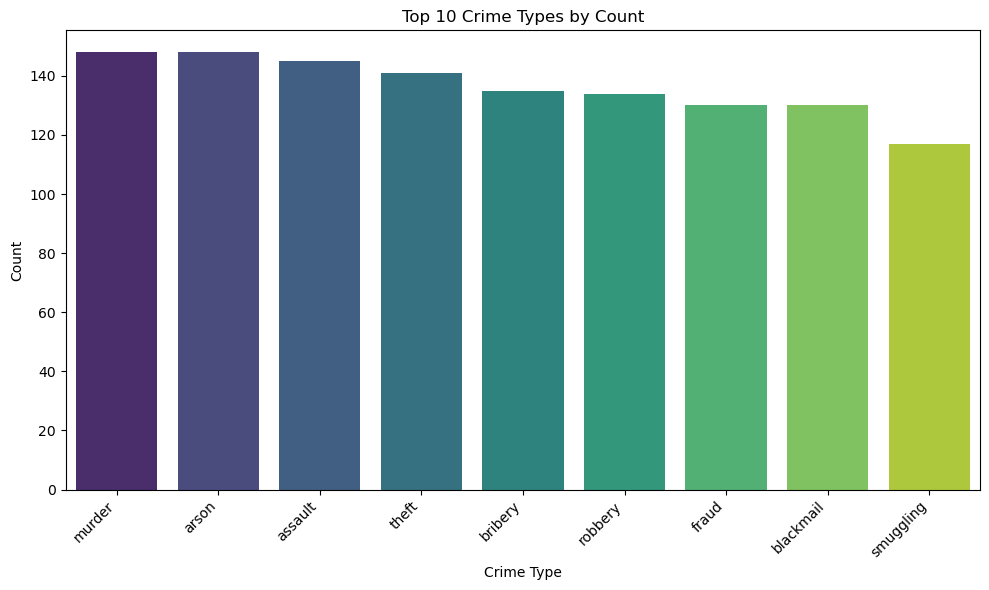

In [73]:
# Graph your results:

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=crime_types, x='type', y='count', palette='viridis')

# Add labels and title
plt.title('Top 10 Crime Types by Count')  #Add Title
plt.xlabel('Crime Type')   #Label x 
plt.ylabel('Count')    #Label y 
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Display the plot
plt.tight_layout()
plt.show()


Answer: Murder and Arson 

<b>Objective 2:</b> The town has also received more funding to encourage DOUBLE overtime for officers in SQL City during the month with the highest crime rate through out the date range of the database. What month would you advise the town to encourage officer overtime?

In [95]:
# takes the month out of the date column and label as month. count * goruped by month. from crime_scene_report ordered by count descending.

with engine.connect() as connection:  # Establish a connection
    query = text("""
        SELECT substr(date, 5, 2) AS month,COUNT(*) AS count
        FROM crime_scene_report
        GROUP BY month
        ORDER BY count DESC
        LIMIT 10
    """)
    
    # Fetch the results directly into a pandas DataFrame
    crime_months = pd.read_sql(query, connection)

# show results in table
crime_months






,month,count
0,01,179
1,04,159
2,03,147
3,02,134
4,06,89
5,11,88
6,09,85
7,10,75
8,05,74
9,12,71


Answer:The months with the highest crome rates are January, April , and March

<b>Objective 3:</b> To thank the officers for their extra training and overtime, the town will pay for their monthly gym membership. They want to give the officers the membership that the least amount of civilians have to avoid being recognized daily as the town heros. The membership can be used in any town. What membership does the town give them?

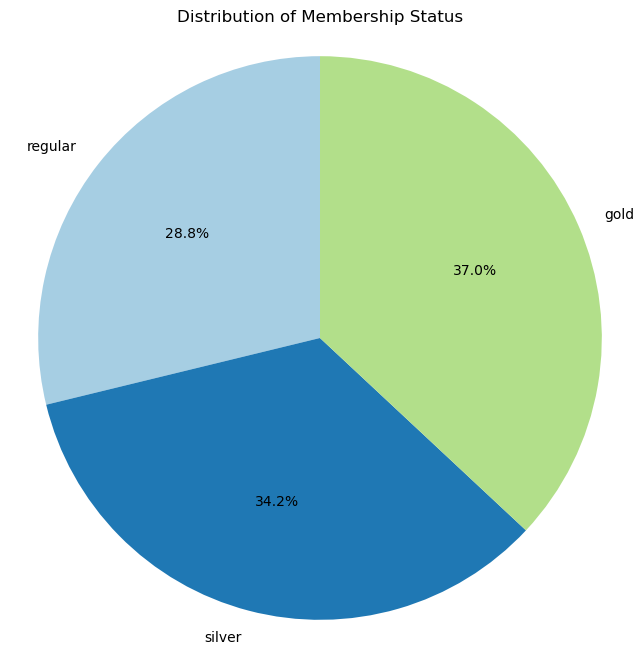

In [114]:
#Select membership_status and count * grouped by membership_status. from get_fit_now_member ordered by count ascending. 

with engine.connect() as connection:  # Establish a connection
    query = text("""
        SELECT membership_status,COUNT(*) AS count
        FROM get_fit_now_member
        GROUP BY membership_status
        ORDER BY count 
        LIMIT 10
    """)
    
    # Fetch the results directly into a pandas DataFrame
    membership_types = pd.read_sql(query, connection)
    

# Create a pie chart using the data
plt.figure(figsize=(8, 8))
#set values and labels for pie chart
plt.pie(membership_types['count'], labels=membership_types['membership_status'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Add a title
plt.title('Distribution of Membership Status')

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()




Answer: The membership with the least amount of membersis the regular membership.


In [116]:
#Disconnect from the database. Always remember to disconnect :) 

connection.close


<bound method Connection.close of <sqlalchemy.engine.base.Connection object at 0x00000225B8C42A20>>